In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os

In [75]:
df=pd.read_excel(r"C:\Users\Cyborg\Downloads\Load Survey Data (6).xlsx")

In [76]:
df.describe()

,KWh,KVAh,Vr,Vy,Vb,Ir,Iy,Ib,Freq,Total Load
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,2.139387,2.153534,237.755997,238.030809,237.909528,4.842399,1.377022,3.071887,49.792224,5.170000e+00
std,2.296270,2.311301,19.318425,19.565254,19.738607,5.106522,1.926937,3.263343,3.669756,4.799399e-14
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.170000e+00
25%,0.000000,0.000000,232.207500,231.635000,231.287500,0.000000,0.000000,0.000000,50.020000,5.170000e+00
50%,0.480000,0.484000,238.160000,238.745000,238.730000,1.250000,0.000000,0.610000,50.060000,5.170000e+00
75%,4.493000,4.520000,245.915000,246.675000,246.747500,10.450000,1.380000,6.535000,50.090000,5.170000e+00
max,5.453000,5.489000,256.620000,258.330000,258.870000,11.430000,5.680000,7.890000,51.510000,5.170000e+00


In [79]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 742
Number of Cols: 13


In [80]:
df.head(12)

,CCMS ID,Timestamp,KWh,KVAh,Vr,Vy,Vb,Ir,Iy,Ib,Freq,PF Total,Total Load
0,SMR03-0219-0252,2019-05-01 23:00:00,2.732,2.752,233.23,234.30,235.21,10.31,5.41,5.79,50.08,0.955 Ld,5.17
1,SMR03-0219-0252,2019-05-01 22:00:00,5.108,5.143,236.64,238.00,238.73,10.53,5.40,5.78,50.08,0.987 Ld,5.17
2,SMR03-0219-0252,2019-05-01 21:00:00,5.120,5.156,237.01,238.69,239.36,10.54,5.40,5.79,50.10,0.987 Ld,5.17
3,SMR03-0219-0252,2019-05-01 20:00:00,4.985,5.025,237.29,238.79,239.56,9.71,5.42,5.79,50.07,0.985 Ld,5.17
4,SMR03-0219-0252,2019-05-01 19:00:00,0.372,0.375,244.08,245.06,245.75,0.52,0.26,0.26,50.24,0.87 Lag,5.17
5,SMR03-0219-0252,2019-05-01 18:00:00,0.000,0.000,241.00,241.85,242.38,0.00,0.00,0.00,50.11,--,5.17
6,SMR03-0219-0252,2019-05-01 17:00:00,0.000,0.000,239.73,240.39,240.82,0.00,0.00,0.00,50.06,--,5.17
7,SMR03-0219-0252,2019-05-01 16:00:00,0.000,0.000,238.14,238.96,239.35,0.00,0.00,0.00,50.01,--,5.17
8,SMR03-0219-0252,2019-05-01 15:00:00,0.000,0.000,241.32,241.94,242.50,0.00,0.00,0.00,50.00,--,5.17
9,SMR03-0219-0252,2019-05-01 14:00:00,0.000,0.000,244.48,244.98,245.67,0.00,0.00,0.00,50.05,--,5.17


In [82]:
df["KWh"].value_counts()

0.000    361
5.089      3
4.461      3
5.204      3
4.477      3
4.354      2
5.194      2
5.218      2
5.227      2
4.703      2
5.212      2
5.024      2
5.101      2
5.211      2
5.028      2
5.205      2
4.388      2
5.267      2
4.423      2
4.403      2
5.215      2
4.379      2
5.207      2
5.238      2
5.198      2
5.113      2
4.578      2
4.411      2
5.187      2
5.183      2
        ... 
4.377      1
4.476      1
4.552      1
5.258      1
0.561      1
4.279      1
4.294      1
1.140      1
4.614      1
5.281      1
4.280      1
0.887      1
4.320      1
5.280      1
2.695      1
0.639      1
4.569      1
3.218      1
3.101      1
4.735      1
4.439      1
1.076      1
0.130      1
4.163      1
4.462      1
4.783      1
4.457      1
4.305      1
1.128      1
4.349      1
Name: KWh, Length: 328, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
CCMS ID       742 non-null object
Timestamp     742 non-null object
KWh           742 non-null float64
KVAh          742 non-null float64
Vr            742 non-null float64
Vy            742 non-null float64
Vb            742 non-null float64
Ir            742 non-null float64
Iy            742 non-null float64
Ib            742 non-null float64
Freq          742 non-null float64
PF Total      742 non-null object
Total Load    742 non-null float64
dtypes: float64(10), object(3)
memory usage: 75.4+ KB


In [87]:
unique_ccms = len(np.unique("CCMS ID"))

In [88]:
print("No of CCMS Given = ", unique_ccms)

No of CCMS Given =  1


### Current in R, Y and B phase is less than 0.2

In [89]:
df.head(3)

,CCMS ID,Timestamp,KWh,KVAh,Vr,Vy,Vb,Ir,Iy,Ib,Freq,PF Total,Total Load
0,SMR03-0219-0252,2019-05-01 23:00:00,2.732,2.752,233.23,234.30,235.21,10.31,5.41,5.79,50.08,0.955 Ld,5.17
1,SMR03-0219-0252,2019-05-01 22:00:00,5.108,5.143,236.64,238.00,238.73,10.53,5.40,5.78,50.08,0.987 Ld,5.17
2,SMR03-0219-0252,2019-05-01 21:00:00,5.120,5.156,237.01,238.69,239.36,10.54,5.40,5.79,50.10,0.987 Ld,5.17


### Distribution of KWH Value

In [90]:
sorted_KWH = df.sort_values(['KWh'], ascending=False)
KWH_counts = sorted_KWH['KWh'].values

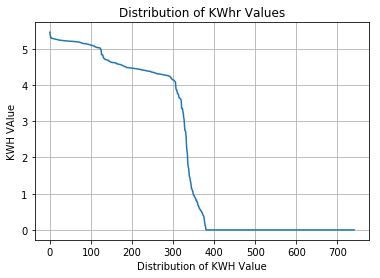

In [99]:
plt.plot(KWH_counts)
plt.title("Distribution of KWhr Values")
plt.grid()
plt.xlabel("Distribution of KWH Value")
plt.ylabel("KWH VAlue")
plt.show()

### Distribution of Vr, Vy, Vb

In [100]:
sorted_Vr = df.sort_values(['Vr'], ascending=False)
Vr_counts = sorted_Vr['Vr'].values
sorted_Vb = df.sort_values(['Vb'], ascending=False)
Vb_counts = sorted_Vb['Vb'].values
sorted_Vy = df.sort_values(['Vy'], ascending=False)
Vy_counts = sorted_Vy['Vy'].values

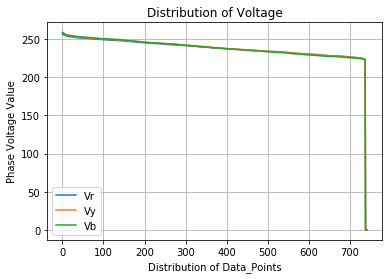

In [102]:
plt.plot(Vr_counts, label="Vr")
plt.plot(Vy_counts, label="Vy")
plt.plot(Vb_counts, label="Vb")
plt.title("Distribution of Voltage")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Phase Voltage Value")
plt.legend()
plt.show()

## Conclusion: All voltages are constant

In [ ]:
df=df[df.Ir>=0.05]
df=df[df.Ib>=0.05]
df=df[df.Iy>=0.05]

In [ ]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

In [ ]:
df=df[df.Ir>=0.4]
df=df[df.Ib>=0.4]
df=df[df.Iy>=0.4]

In [ ]:
df=df[df.Ir>=0.4]
df=df[df.Ib>=0.4]
df=df[df.Iy>=0.4]

In [ ]:
df=df[df.Ir>=0.4]
df=df[df.Ib>=0.4]
df=df[df.Iy>=0.4]

In [ ]:
df=df[df.Ir>=0.4]
df=df[df.Ib>=0.4]
df=df[df.Iy>=0.4]

In [65]:
df=df[df.Ir>=0.1]
df=df[df.Ib>=0.1]
df=df[df.Iy>=0.1]

### New shape of data

In [66]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 362
Number of Cols: 13


In [67]:
df=df[df.Ir>=0.2]
df=df[df.Ib>=0.2]
df=df[df.Iy>=0.2]

In [68]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 360
Number of Cols: 13


In [69]:
df=df[df.Ir>=0.3]
df=df[df.Ib>=0.3]
df=df[df.Iy>=0.3]

In [70]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 358
Number of Cols: 13


In [71]:
df=df[df.Ir>=0.4]
df=df[df.Ib>=0.4]
df=df[df.Iy>=0.4]

In [72]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 355
Number of Cols: 13


In [73]:
df=df[df.Ir>=0.5]
df=df[df.Ib>=0.5]
df=df[df.Iy>=0.5]

In [74]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 354
Number of Cols: 13


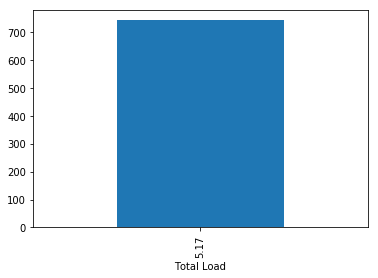

In [42]:
df.groupby("Total Load")['Freq'].count().plot.bar()

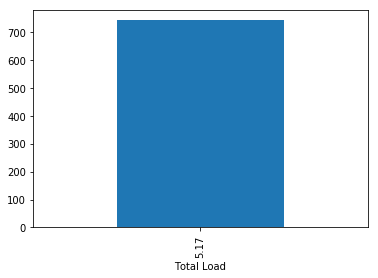

In [45]:
df.groupby("Total Load")["Vr "].count().plot.bar()

In [ ]:
df=df[]